In [ ]:
import pandas as pd

dry_data = pd.read_csv('dry.csv', sep=',', header=None)
# get average of column 2
fluxdry = dry_data.iloc[:, 1].mean() # W/m^2
# get average of column 3
Tsdry = dry_data.iloc[:, 2].mean() # °C
Tairdry = dry_data.iloc[:, 4].mean() # °C
# calculate h
hdry= fluxdry/ (Tsdry - Tairdry) # W/m^2-K

wet_data = pd.read_csv('wet.csv', sep=',', header=None)
# get average of column 2
fluxwet = wet_data.iloc[:, 1].mean() # W/m^2
# get average of column 3
Tswet = wet_data.iloc[:, 2].mean() # °C
Tairwet = wet_data.iloc[:, 4].mean() # °C
# calculate T film
Tf = ((Tswet + Tairwet) / 2)+273.15 # K
# properties from table 
T1 = 250
p1 = 1.3947
cp1 = 1.006
mu1 = 159.6e-7
v1 = 11.44e-6
k1 = 22.3e-3
a1 = 15.9e-6
Pr1 = 0.72
T2 = 300
p2 = 1.1614
cp2 = 1.007
mu2 = 184.6e-7
v2 = 15.89e-6
k2 = 26.2e-3
a2 = 22.5e-6
Pr2 = 0.707

# interpolate for k, a
k = k1 + (k2 - k1) / (T2 - T1) * (Tf - T1) # W/m-K
a = a1 + (a2 - a1) / (T2 - T1) * (Tf - T1) # m^2/s
# calculate D
D = a/0.85 # m^2/s
# calculate h
hwet = fluxwet / (Tswet - Tairwet) # W/m^2-K
# calculate hm
hm = hwet*(D/k)*(0.85**(1/3)) # m/s
# display in dataframe with columns q", Ts, Tair, Tav, k, a, D, h, hm
data = {'q" (W/m^2)': [fluxdry, fluxwet], 'Ts(°C)': [Tsdry, Tswet], 'Tair(°C)': [Tairdry, Tairwet], 'Tav(°C)': ["---", Tf-273.15], 'k(W/m-K)': ["---", k], 'a(m^2/s)': ["---", a], 'D(m^2/s)': ["---", D], 'h(W/m^2-K)': [hdry, hwet], 'hm(m/s)': ["---", hm]}
df = pd.DataFrame(data, index=['dry', 'wet'])
df


,"q"" (W/m^2)",Ts(°C),Tair(°C),Tav(°C),k(W/m-K),a(m^2/s),D(m^2/s),h(W/m^2-K),hm(m/s)
dry,298.270588,31.482353,18.038235,---,---,---,---,22.185955,---
wet,632.970000,24.428000,18.088000,21.258,0.025764,0.000022,0.000026,99.837539,0.09398


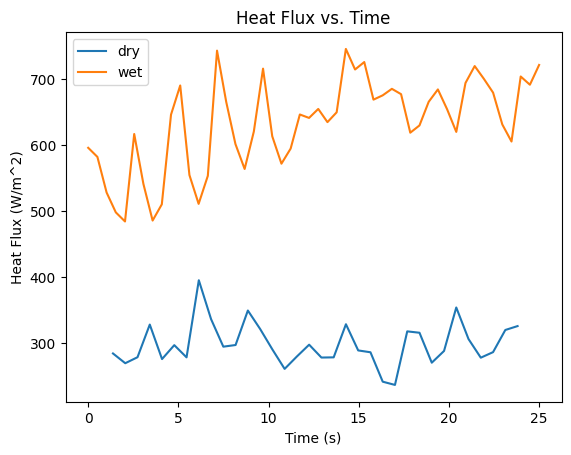

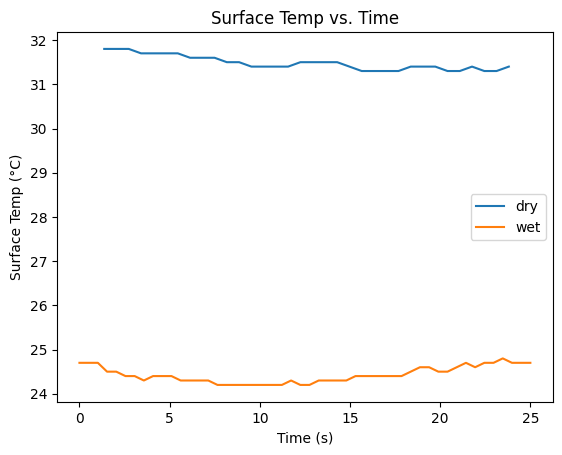

In [65]:
# plot heat flux as a function of time
import matplotlib.pyplot as plt
import numpy as np
plt.plot(dry_data.iloc[:, 0], dry_data.iloc[:, 1], label='dry')
# shift wet data to start at 0
plt.plot(np.linspace(0, 25, len(wet_data.iloc[:, 0])), wet_data.iloc[:, 1], label='wet')
plt.xlabel('Time (s)')
plt.ylabel('Heat Flux (W/m^2)')
plt.title('Heat Flux vs. Time')
plt.legend()
plt.figure()
# plot surface temp as a function of time
plt.plot(dry_data.iloc[:, 0], dry_data.iloc[:, 2], label='dry')
# shift wet data to start at 0
plt.plot(np.linspace(0, 25, len(wet_data.iloc[:, 0])), wet_data.iloc[:, 2], label='wet')
plt.xlabel('Time (s)')
plt.ylabel('Surface Temp (°C)')
plt.title('Surface Temp vs. Time')
plt.legend()


In [ ]:
# properties at Ts and Tinf
T290 = 290 #K
p290 = 1/69.7 #kg/m^3
T295 = 295 #K
hfg295 = 2449 #kJ/kg
p295 = 1/51.94 #kg/m^3
T300 = 300 #K
hfg300 = 2438 #kJ/kg
p300 = 1/39.13 #kg/m^3
hfgTs = hfg295 + (hfg300 - hfg295) / (T300 - T295) * (Tf - T295) #kJ/kg
pTs = p295 + (p300 - p295) / (T300 - T295) * (Tf - T295) #kg/m^3
pTwetair = p290 + (p295 - p290) / (T295 - T290) * (Tf - T290) #kg/m^3
print("At temperature of Ts=",Tswet, "K, hfg = ", hfgTs, "kJ/kg")
print("At temperature of Ts=", Tswet, "K, Csat = ", pTs, "kg/m^3")
print("At temperature of Tinf=", Tairwet, "K, Csat@inf = ", pTwetair, "kg/m^3")

At temperature of Ts= 24.428 K, hfg =  2450.3024 kJ/kg
At temperature of Ts= 24.428 K, Csat =  0.018506726145414744 kg/m^3
At temperature of Tinf= 18.088 K, Csat@inf =  0.01867213963358004 kg/m^3


In [ ]:
# first assume a relative humidity of 0.5
phi = 0.5
p = pTwetair * phi #kg/m^3
J = hm*(pTs-p) #kg/s/m^2
Jhfg = J*hfgTs*1000 #W/m^2
qc = hwet*(Tswet-Tairwet) #W/m^2
qtot = qc + Jhfg #W/m^2
Jhfgq = Jhfg/qtot

#print in a table
data2 = {'phi': [phi], 'Cinf(kg/m^3)': [p], 'J"(kg/s/m^2)': [J], 'J"hfg(W/m^2)': [Jhfg], 'q"c(W/m^2)': [qc], 'qtot(W/m^2)': [qtot], 'Jhfg/qtot': [Jhfgq]}
df2 = pd.DataFrame(data2)
print(df2)

   phi  Cinf(kg/m^3)  J"(kg/s/m^2)  J"hfg(W/m^2)  q"c(W/m^2)  qtot(W/m^2)  \
0  0.5      0.009336      0.000862   2111.804111      632.97  2744.774111   

   Jhfg/qtot  
0   0.769391  


In [ ]:
# next assume a relative humidity of 0.7
phi = 0.7
p = pTwetair * phi #kg/m^3
J = hm*(pTs-p) #kg/s/m^2
Jhfg = J*hfgTs*1000 #W/m^2
qc = hwet*(Tswet-Tairwet) #W/m^2
qtot = qc + Jhfg #W/m^2
Jhfgq = Jhfg/qtot

#print in a table
data3 = {'phi': [phi], 'Cinf(kg/m^3)': [p], 'J"(kg/s/m^2)': [J], 'J"hfg(W/m^2)': [Jhfg], 'q"c(W/m^2)': [qc], 'qtot(W/m^2)': [qtot], 'Jhfg/qtot': [Jhfgq]}
df3 = pd.DataFrame(data3)
print(df3)

   phi  Cinf(kg/m^3)  J"(kg/s/m^2)  J"hfg(W/m^2)  q"c(W/m^2)  qtot(W/m^2)  \
0  0.7       0.01307      0.000511   1251.846005      632.97  1884.816005   

   Jhfg/qtot  
0   0.664174  


In [ ]:
# next assume a relative humidity of 0.68
phi = 0.68
p = pTwetair * phi #kg/m^3
J = hm*(pTs-p) #kg/s/m^2
Jhfg = J*hfgTs*1000 #W/m^2
qc = hwet*(Tswet-Tairwet) #W/m^2
qtot = qc + Jhfg #W/m^2
Jhfgq = Jhfg/qtot

#print in a table
data4 = {'phi': [phi], 'Cinf(kg/m^3)': [p], 'J"(kg/s/m^2)': [J], 'J"hfg(W/m^2)': [Jhfg], 'q"c(W/m^2)': [qc], 'qtot(W/m^2)': [qtot], 'Jhfg/qtot': [Jhfgq]}
df4 = pd.DataFrame(data4)
print(df4)

    phi  Cinf(kg/m^3)  J"(kg/s/m^2)  J"hfg(W/m^2)  q"c(W/m^2)  qtot(W/m^2)  \
0  0.68      0.012697      0.000546   1337.841815      632.97  1970.811815   

   Jhfg/qtot  
0   0.678828  


In [73]:
df = pd.concat([df2, df3, df4], ignore_index=True)
df

,phi,Cinf(kg/m^3),"J""(kg/s/m^2)","J""hfg(W/m^2)","q""c(W/m^2)",qtot(W/m^2),Jhfg/qtot
0,0.50,0.009336,0.000862,2111.804111,632.97,2744.774111,0.769391
1,0.70,0.013070,0.000511,1251.846005,632.97,1884.816005,0.664174
2,0.68,0.012697,0.000546,1337.841815,632.97,1970.811815,0.678828
